##### Import the GIS module and other needed Python modules


The IPython.display module has some helper functions that the Python API takes advantage of for displaying objects like item details and maps in the notebook.

In [1]:
from arcgis.gis import GIS
from getpass import getpass
from IPython.display import display

##### Create the GIS object and point it to AGOL

In [4]:
# Get username and password
username = input('Username: ')
password = getpass(prompt='Password: ')

Username: cambgis_sean
Password: ········


In [5]:
# Connect to portal
gis = GIS("https://arcgis.com/", username, password)

##### Test the connection
The output here is an example of the Python API taking advantage of IPython.display.  The *me* property gives you a direct shortcut to the *User* object for the logged in user. 

<User username:cambgis_sean>
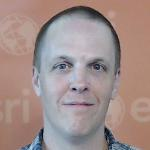

In [6]:
me = gis.users.me
me

You can also search for other users.

In [8]:
username = input('Username: ')

Username: cambgis_user


In [9]:
user = gis.users.get(username)
user

<User username:cambgis_user>

##### User properties

There are a number of properties that can be accessed the *user* resource.  The full list can be found here: [User](http://resources.arcgis.com/en/help/arcgis-rest-api/#/User/02r3000000m2000000/).

In [10]:
print("Description: {}\nEmail: {}\nLast Name: {}\nFirst Name: {}\nName: {}\nLevel: {}\nMFA Enabled: {}".format(me.description, me.email, me.firstName, me.lastName, me.fullName, me.level, me.mfaEnabled))

user_groups = me.groups
print("Member of " + str(len(user_groups)) + " groups")

Description: GIS Programmer Analyst for the City of Cambridge, MA
Email: ssweeney@cambridgema.gov
Last Name: Sean
First Name: Sweeney
Name: Sean Sweeney
Level: 2
MFA Enabled: False
Member of 22 groups


The Python *time* module can be used to display time values in human readable form.

ArcGIS Online stores time in **milliseconds** since the epoch, but the Python time library is expecting **seconds** since the epoch (aka Unix time, epoch time), so the AGOL times need to be divided by 1000 when using the *time* module.

In [ ]:
import time

created_time = time.localtime(me.created/1000)
print("Created: {}/{}/{}".format(created_time[1], created_time[2], created_time[0]))

last_accessed = time.localtime(me.lastLogin/1000)
print("Last active: {}/{}/{}".format(last_accessed[1], last_accessed[2], last_accessed[0]))

##### Searching for user accounts
Parameters here: http://resources.arcgis.com/en/help/arcgis-rest-api/index.html#//02r30000009v000000  
and here: http://resources.arcgis.com/en/help/arcgis-rest-api/#/Search_reference/02r3000000mn000000/

The *gis.users.search* method allows you to perform search operations using wildcards.

In [11]:
tpt_users = gis.users.search('username:tpt_*',max_users=10000)
len(tpt_users)

6

The power of Python can also be used to search for specific patterns.

In [12]:
# Get a list of all users
all_users = gis.users.search(None, max_users=500)
len(all_users)

194

In [13]:
# Use list comprehension to create a subset list of disabled users
disabled_users = [user for user in all_users if user.disabled == True]
len(disabled_users)

44

##### Finding the items owned by users
Items are either in a folder or not.  The latter are called root items.  There can only be one folder level, so only one level needs to be traversed.

In [ ]:
from operator import attrgetter

for user in sorted(disabled_users, key=attrgetter('lastName', 'firstName')):
    print(user.fullName + " (" + user.username + ")")
    # user.items() returns a list of root items.
    total_items = len(user.items())
    print("Root items:" + str(total_items))
    # user.folders returns a list of folders
    folders = user.folders
    print("Folders: " + str(len(folders)))
    for folder in folders:
        # The folder parameter on user.items() returns a list of items in the given folder
        folder_items = len(user.items(folder = folder))
        print("Folder " + folder["title"] + " items:" + str(folder_items))
        total_items += folder_items

    print("Total items: " + str(total_items))
    print("=" * 25)